Name : Wong Thai Siang

Title : Discovering the Factors Affecting Resale Prices of HDB flats in Singapore.

URLS: https://data.gov.sg/dataset/resale-flat-prices , https://data.gov.sg/dataset/median-rent-by-town-and-flat-type 
        


For my first analysis, I want to find out whats the distribution of resale prices of HDB flats. I will be conducting this analysis by using the most recent dataset of the resale flats.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

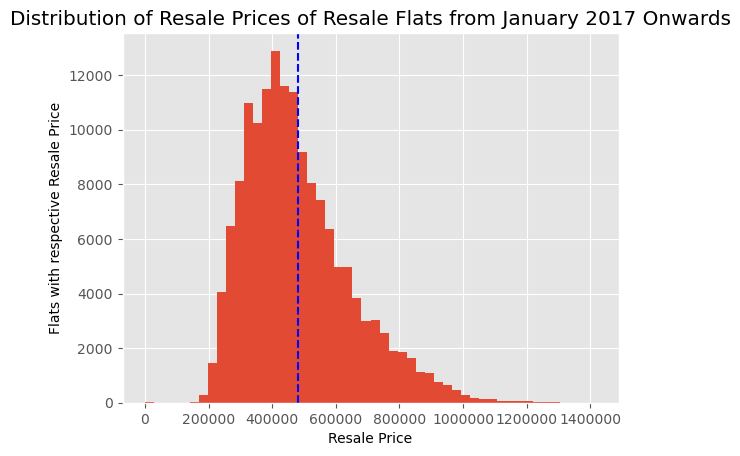

In [71]:



data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)
price = data[:]["resale_price"]

plt.title('Distribution of Resale Prices of Resale Flats from January 2017 Onwards')
plt.ylabel('Flats with respective Resale Price')
plt.xlabel("Resale Price")
plt.style.use("ggplot")
plt.hist(price, bins =50)
plt.ticklabel_format(style='plain', axis='x')
avg_price = price.mean()
plt.axvline(avg_price, color='b', linestyle='--', label="Mean")

plt.show()

In [6]:

# unique_town = np.unique(data[:]["town"])
# avg_price = []
# for i in unique_town:
#     indices = np.where(town == i)
#     tem_avg = np.mean(data[indices]['resale_price'])
#     tem_avg = int(tem_avg)
#     avg_price.append(tem_avg)

# summary = np.vstack((unique_town,avg_price)).T
# sort_summary = summary[summary[:,1].argsort()]
# bot_3 = sort_summary[:3]
# print(bot_3[1])


In Analysis 2, i will be determining the trend of increase in rent prices over every 5 year interval by using the median rent and flat type as my basis of comparison. There are some considerations that are left out in this analysis, mainly the location of said housing which could be a factor in determing the median rent.

In [7]:

plt.style.use('ggplot')

data = np.genfromtxt('./datasets/median-rent-by-town-and-flat-type.csv', dtype = ['U32','U32','U32','i8'], delimiter=",", names = True, missing_values=['na','-'], filling_values= 0 )


#Next, I would like to find the unique years in the data set using the first 4 characters of the 'quarter' column
unique_years = np.unique([row[0][:4] for row in data])

print(unique_years)




['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022']


For analysis 3, I will be finding the relationship between the storey range and price of resale flats. I will be using the dataset of HDB resale prices from 2017 onwards. This will be illustrated through a series of bar graphs.

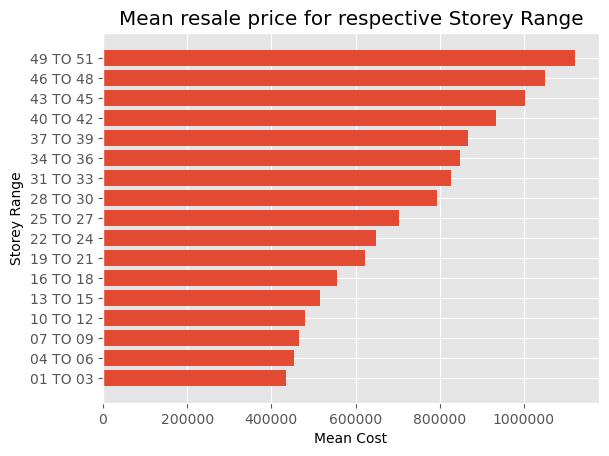

In [8]:


data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)

listOfStoreys = np.unique(data[:]["storey_range"])
listOfMean = []
for i in listOfStoreys:
    indicies = np.where(data[:]["storey_range"] == i)
    tem_sum = data[indicies]["resale_price"].mean()
    listOfMean.append(tem_sum)

fig, ax = plt.subplots()
plt.style.use("ggplot")
plt.title("Mean resale price for respective Storey Range")
plt.ylabel("Storey Range")
plt.xlabel("Mean Cost")
plt.ticklabel_format(style='plain', axis='x')
ax.barh(listOfStoreys,listOfMean)
plt.show()

From the above bar graph, we can conclude that the higher the storey range, the higher the resale price. This tells me that there is a demand for high-rise HDB buildings and Resale Flats in Singapore.

For Analysis 4,

The question for this analysis is: "What is the most popular HDB type among resale flats?"

I will be using the dataset I have found on data.gov.sg, "Number of Resale Applications Registered by Flat Type, by Quarter".

My hypothesis is that the Number of Resale Applications will increase as the Number of Rooms in the Flat Type increases.

Through my data representation, I will find a conclusion to this question.

['1-ROOM' '2-ROOM' '3-ROOM' '4-ROOM' '5-ROOM' 'EXEC']


/tmp/ipykernel_11292/979345482.py:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fig,labels=labels,loc='center left', bbox_to_anchor = (-0.1,1.))


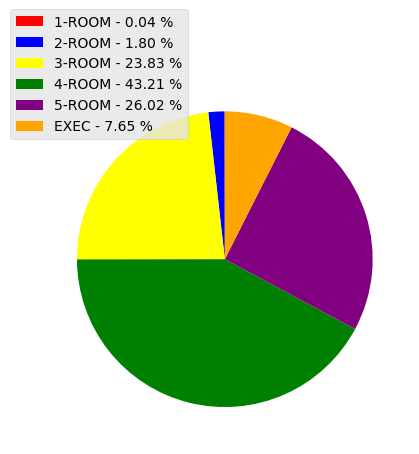

[0.038, 1.796, 23.827, 43.212, 26.017, 7.65]


In [131]:


data = np.genfromtxt('./datasets/number-of-resale-applications-registered-by-flat-type.csv', dtype=['U8','U8','i8'],delimiter= ',',names=True)

unique_years = np.unique([row[0][:4] for row in data])

data_2020_onwards = []
for i in data:
    year_quarter = i[0]  # Assuming the "year-quarter" column is at index 0 in each tuple
    
    if year_quarter[:4] >= '2020':
        data_2020_onwards.append(i)


flat = np.unique([data[1] for data in data_2020_onwards])
print(flat)
numbers = []
for i in flat:
    indicies = np.where(data['flat_type'] == i)
    numbers.append(data[indicies]['no_of_resale_applications'].sum())

# Changes sums into percentages
for i in range(len(numbers)):
    numbers[i] = numbers[i]/1000

colors = ["red","blue","yellow","green","purple","orange"]
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(flat,numbers)]
fig = plt.pie(numbers,startangle=90,colors=colors)
plt.legend(fig,labels=labels,loc='center left', bbox_to_anchor = (-0.1,1.))
plt.show()



Object `a.any` not found.
